## Lab 1- Python

Let start with generating some fake random data. You can get a random number between 0 and 1 using the python random module as follow:

In [1]:
import random
x=random.random()
print("The Value of x is", x)

The Value of x is 0.9435087639130889


### Exercise 1.1
Using random, write a function GenerateData(N, mymin, mymax), that returns a python list containing N random numbers between specified minimum and maximum value. Note that you may want to quickly work out on paper how to turn numbers between 0 and 1 to between other values. 

In [62]:
# Skeleton
def GenerateData(N,min,max):
    out = []
    
    for i in range(N):
     #   out.append(random.uniform(min,max))        # using a much easier alternative
        out.append((max-min)*random.random() + min) # manually making values from min to max
    #print(out)
    return out

Data=GenerateData(10000,-10,10)
print("Data Type:", type(Data))
print("Data Length:", len(Data))
if len(Data)>0: 
    print("Type of Data Contents:", type(Data[0]))
    print("Data Minimum:", min(Data))
    print("Data Maximum:", max(Data))

Data Type: <class 'list'>
Data Length: 10000
Type of Data Contents: <class 'float'>
Data Minimum: -9.999825689365485
Data Maximum: 9.997231683947444


### Exercise 1.2

Write a function that computes the mean of values in a list.

In [37]:
# Skeleton
def mean(Data):
    m=0
    for i in Data:
        m+= i
    m = m/len(Data)
    
    return m

print("Mean of Data:", mean(Data))

Mean of Data: 0.013110770575331117


### Exercise 1.3

Write a function the applies a booling function (that returns true/false) to every element in data, and return a list of indices of elements where the result was true. Use this function to find the indices of positive entries. 

In [63]:
def where(mylist,myfunc):
## what is the purpose of myfunc parameter??
    out= []
    for i in range(len(mylist)):
        if myfunc(mylist[i]) == True:
            out.append(i)
            
    #print(out)
    
    return out

### Exercise 1.4

The inrange(mymin,mymax) function below returns a function that tests if it's input is between the specified values. Use this function, in conjunction to your solution to 1.3, to demonstrate that your data is "flat". Hint: pick several sub-ranges and show that the number of data point divided by the size of the range is roughly constant. 

In [78]:
def inrange(mymin,mymax):
    def testrange(x):
        return x<mymax and x>=mymin
    return testrange

# Examples:
F1=inrange(0,10)
F2=inrange(10,20)
F3=inrange(2,8)
F4=inrange(4,6)
F5=inrange(3,9)

#print(F1(0),"_", F1(1), F1(10), F1(15), F1(20))
#print(F2(0), F2(1), F2(10), F2(15), F2(20))
range1 = len(where(Data,F1))
range3 = len(where(Data,F3))
range4 = len(where(Data,F4))
range5 = len(where(Data,F5))


print("Number of Entries passing F1:", len(where(Data,F1)))
print("Number of Entries passing F2:", len(where(Data,F2)))
print(range1/10)
print(range3/6)
print(range4/2)
print(range5/6)

5035
0
3021
1023
3054
Number of Entries passing F1: 5035
Number of Entries passing F2: 0
503.5
503.5
511.5
509.0


### Exercise 1.5

Repeat Exercise 1.4 using the built in python functions sum and map instead of your solution to 1.3. 

In [81]:
### BEGIN SOLUTION

print(sum(map(F1,Data))/10)
print(sum(map(F2,Data))/10)
print(sum(map(F3,Data))/6)
print(sum(map(F4,Data))/2)
print(sum(map(F5,Data))/6)
    
# method is much cleaner and requires less code
### END SOLUTION

503.5
0.0
503.5
511.5
509.0


### Exercise 1.6

Write a new function called GenerateDataFromFunction(N,mymin,mymax,myfunc), that instead of generating a flat distribution, generates a distribution with functional form coded in myfunc. Note that myfunc will always be > 0.  

Use your function to generate 1000 numbers that are Gaussian distributed, using the Gaussian function below. Confirm the mean of the data is close to mean you specify when building the Gaussian. 

Hint: A simple, but slow, solution is to a draw random number test_x within the specified range and another number p between the min and max of the function (which you will have to determine). If p<=function(test_x), then place test_x on the output. If not, repeat the process, drawing two new numbers. Repeat until you have the specified number of generated numbers, N. For this problem, it's OK to determine the min and max by numerically sampling the function.  



In [99]:
def GenerateDataFromFunction(N,mymin,mymax,myfunc):
    out = []
    data_points = sorted(GenerateData(N,mymin,mymax))
    #print(data_points)
    for i in data_points:
            out.append(myfunc(i))
    return data_points, out

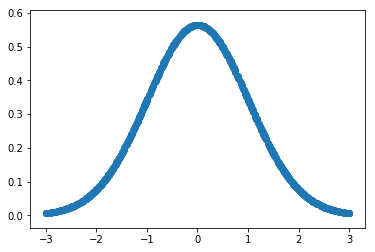

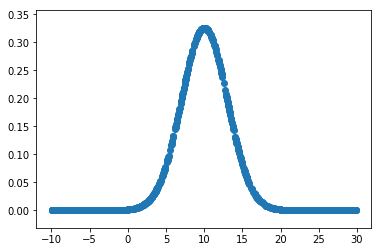

In [124]:
import math
from matplotlib import pyplot as plt

def gaussian(mean, sigma):
    def f(x):
        return math.exp(-((x-mean)**2)/(2*sigma**2))/math.sqrt(math.pi*sigma) ## function was missing a minus out front
    return f

# Example Instantiation
g1=gaussian(0,1)
g2=gaussian(10,3)

def y(x):
    return x**2 - 8


xaxis ,yaxis = GenerateDataFromFunction(1000,-3,3,g1)
fig1 = plt.scatter(xaxis,yaxis)
plt.show()
xaxis ,yaxis = GenerateDataFromFunction(1000,-10,30,g2)
plt.scatter(xaxis,yaxis)